# Linear Regression

#### Types-
1. Simple Linear Regression
2. Multiple Linear Regression
3. Polynomial Linear Regression

## 1. Simple LR

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data/placement-1.csv')

In [5]:
df.sample(5)

,cgpa,package
169,9.31,4.37
171,8.01,3.76
57,6.60,1.94
46,6.07,2.26
64,7.36,2.92


In [6]:
df.isnull().sum()

cgpa       0
package    0
dtype: int64

Text(0, 0.5, 'Package in lakhs')

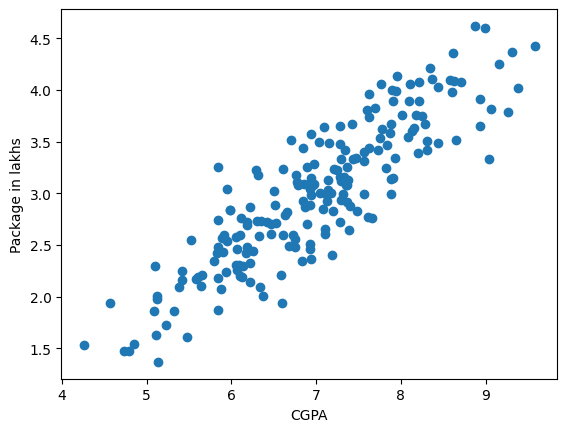

In [7]:
plt.scatter(df['cgpa'], df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package in lakhs')

In [9]:
X = df.iloc[:,0:1]
y = df.iloc[:,1]

y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [12]:
lr.fit(X_train, y_train)

LinearRegression()

In [13]:
y_pred = lr.predict(X_test)

In [16]:
y_test

95     2.79
15     3.23
30     3.26
158    3.04
128    3.34
115    4.21
69     2.94
170    2.87
174    2.99
45     3.58
66     1.63
182    2.08
165    4.08
78     2.21
186    3.47
177    3.64
56     2.74
152    3.08
82     2.17
68     2.99
124    2.31
16     2.35
148    3.40
93     3.08
65     3.81
60     2.19
84     1.53
67     2.89
125    3.16
132    2.48
9      3.51
18     2.98
55     3.39
75     3.28
150    2.73
104    3.74
135    2.60
137    3.13
164    3.82
76     3.15
Name: package, dtype: float64

In [17]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.7730984312051673

Text(0, 0.5, 'Package(in lpa)')

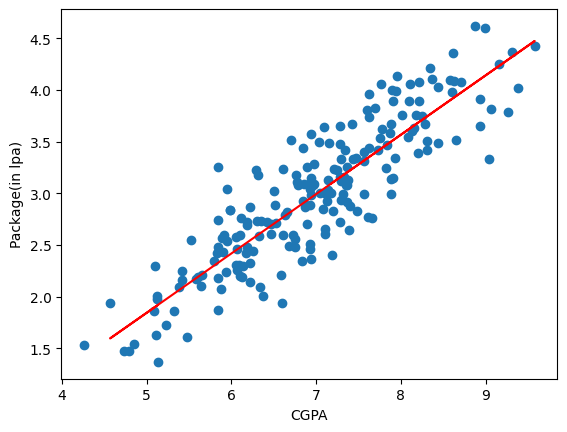

In [18]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [19]:
lr.coef_ , lr.intercept_

(array([0.57425647]), -1.0270069374542108)

#### My custom LR (using OLS)

In [1]:
class MeraLR:
    
    def __init__(self):
        self.m = None
        self.b = None
        
    def fit(self,X_train,y_train):
        
        num = 0
        den = 0
        
        for i in range(X_train.shape[0]):
            
            num = num + ((X_train[i] - X_train.mean())*(y_train[i] - y_train.mean()))
            den = den + ((X_train[i] - X_train.mean())*(X_train[i] - X_train.mean()))
        
        self.m = num/den
        self.b = y_train.mean() - (self.m * X_train.mean())
        print(self.m)
        print(self.b)       
    
    def predict(self,X_test):
        
        print(X_test)
        
        return self.m * X_test + self.b

In [3]:
import numpy as np
import pandas as pd
df = pd.read_csv('data/placement-1.csv')
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [4]:
X = df.iloc[:,0].values
y = df.iloc[:,1].values
X

array([6.89, 5.12, 7.82, 7.42, 6.94, 7.89, 6.73, 6.75, 6.09, 8.31, 5.32,
       6.61, 8.94, 6.93, 7.73, 7.25, 6.84, 5.38, 6.94, 7.48, 7.28, 6.85,
       6.14, 6.19, 6.53, 7.28, 8.31, 5.42, 5.94, 7.15, 7.36, 8.1 , 6.96,
       6.35, 7.34, 6.87, 5.99, 5.9 , 8.62, 7.43, 9.38, 6.89, 5.95, 7.66,
       5.09, 7.87, 6.07, 5.84, 8.63, 8.87, 9.58, 9.26, 8.37, 6.47, 6.86,
       8.2 , 5.84, 6.6 , 6.92, 7.56, 5.61, 5.48, 6.34, 9.16, 7.36, 7.6 ,
       5.11, 6.51, 7.56, 7.3 , 5.79, 7.47, 7.78, 8.44, 6.85, 6.97, 6.94,
       8.99, 6.59, 7.18, 7.63, 6.1 , 5.58, 8.44, 4.26, 4.79, 7.61, 8.09,
       4.73, 6.42, 7.11, 6.22, 7.9 , 6.79, 5.83, 6.63, 7.11, 5.98, 7.69,
       6.61, 7.95, 6.71, 5.13, 7.05, 7.62, 6.66, 6.13, 6.33, 7.76, 7.77,
       8.18, 5.42, 8.58, 6.94, 5.84, 8.35, 9.04, 7.12, 7.4 , 7.39, 5.23,
       6.5 , 5.12, 5.1 , 6.06, 7.33, 5.91, 6.78, 7.93, 7.29, 6.68, 6.37,
       5.84, 6.05, 7.2 , 6.1 , 5.64, 7.14, 7.91, 7.19, 7.91, 6.76, 6.93,
       4.85, 6.17, 5.84, 6.07, 5.66, 7.57, 8.28, 6.

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
X_train.shape

(160,)

In [6]:
lr = MeraLR()
lr.fit(X_train,y_train)

0.5579519734250721
-0.8961119222429152


In [7]:
y_pred = lr.predict(X_test)

[8.58 7.15 5.88 6.22 4.57 4.79 5.32 6.86 8.35 6.87 8.94 7.9  6.93 5.91
 7.32 7.82 5.09 7.42 6.94 7.73 6.19 7.28 6.73 7.2  8.21 6.75 7.87 7.6
 8.63 5.12 8.15 7.36 8.31 6.6  6.59 7.47 7.93 6.29 6.37 6.47]


In [8]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.7807301475103842

#### Regression Statistics-

1. MAE
2. MSE
3. RMSE
4. R2 Score
5. Adjusted R2 Score

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df = pd.read_csv('data/placement-1.csv')
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'Package(in lpa)')

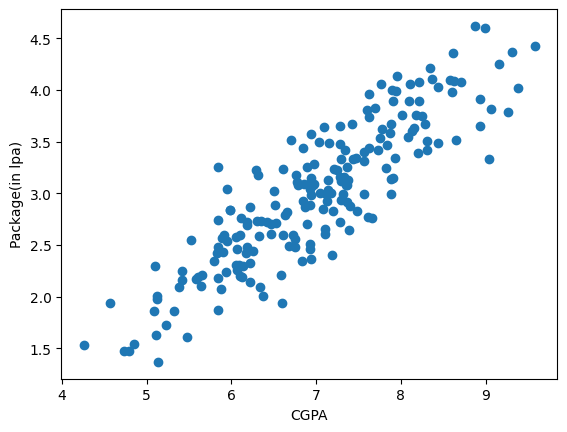

In [6]:

plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [7]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

Text(0, 0.5, 'Package(in lpa)')

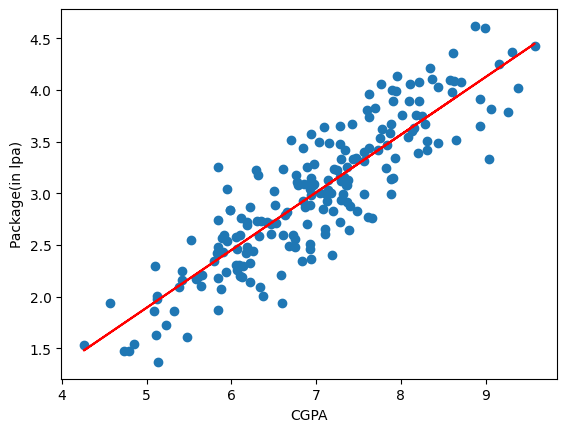

In [9]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [10]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
y_pred = lr.predict(X_test)
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [12]:
print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2SquareE",r2_score(y_test,y_pred))

MAE 0.2884710931878175
MSE 0.12129235313495527
RMSE 0.34827051717731616
R2SquareE 0.780730147510384


## 2. Multiple Regression

In [14]:
from sklearn.datasets import make_regression
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
     

X,y = make_regression(n_samples=100, n_features=2, n_informative=2, n_targets=1, noise=50)
     

df = pd.DataFrame({'feature1':X[:,0],'feature2':X[:,1],'target':y})
     

df.shape

(100, 3)

In [15]:
df.head()

,feature1,feature2,target
0,-0.612809,0.792301,-0.651431
1,-0.279591,0.270380,64.152965
2,-1.268106,0.576709,-37.468309
3,-0.464875,1.653290,127.672197
4,-0.346437,1.874521,102.412153


In [16]:

fig = px.scatter_3d(df, x='feature1', y='feature2', z='target')

fig.show()

In [17]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=3)
     

from sklearn.linear_model import LinearRegression
     

lr = LinearRegression()
     

lr.fit(X_train,y_train)

LinearRegression()

In [18]:
y_pred = lr.predict(X_test)
     

print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("R2 score",r2_score(y_test,y_pred))

MAE 46.93194057098405
MSE 3489.4649267711457
R2 score 0.5211883646532133


In [26]:

x = np.linspace(-5, 5, 10)
y = np.linspace(-5, 5, 10)
xGrid, yGrid = np.meshgrid(y, x)

z_final = lr.predict().reshape(10,10)

z = z_final

final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T
     

fig = px.scatter_3d(df, x='feature1', y='feature2', z='target')  

fig.add_trace(go.Surface(x = x, y = y, z =z ))

fig.show()

#### My custom Multiple LR using OLS

In [1]:
import numpy as np
from sklearn.datasets import load_diabetes
X,y = load_diabetes(return_X_y=True)
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [2]:
# skelarn ko mauka
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
print(X_train.shape)
print(X_test.shape)

(353, 10)
(89, 10)


In [3]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [4]:
y_pred = reg.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.4399387660024644

In [5]:
reg.coef_

array([  -9.16088483, -205.46225988,  516.68462383,  340.62734108,
       -895.54360867,  561.21453306,  153.88478595,  126.73431596,
        861.12139955,   52.41982836])

In [6]:
# MY own lr

class MeraLR:
    
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None
        
    def fit(self,X_train,y_train):
        X_train = np.insert(X_train,0,1,axis=1)
        
        # calcuate the coeffs
        betas = np.linalg.inv(np.dot(X_train.T,X_train)).dot(X_train.T).dot(y_train)
        self.intercept_ = betas[0]
        self.coef_ = betas[1:]
    
    def predict(self,X_test):
        y_pred = np.dot(X_test,self.coef_) + self.intercept_
        return y_pred
        

In [7]:
lr = MeraLR()
lr.fit(X_train,y_train)
X_train.shape

(353, 10)

In [8]:
np.insert(X_train,0,1,axis=1).shape

(353, 11)

In [9]:
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.4399387660024643

In [10]:
lr.coef_

array([  -9.16088483, -205.46225988,  516.68462383,  340.62734108,
       -895.54360867,  561.21453306,  153.88478595,  126.73431596,
        861.12139955,   52.41982836])

In [11]:

lr.intercept_

151.88334520854625

## 3. Polynomial Regression-